In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Currently data is in directories like

In [3]:
# Try a new CNN with the input data augmented so it will classify obscured spheres
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

#########################################################
# With this the whole file structure had to be changed.
# TODO Use code for test train split, currently the last 10 or so files are used as test, not randomly
#   For test/train split
#       get list of positives and negatives, test/train split the list.
#       move all filenames in that list to either test, or train directory
#########################################################

from keras.preprocessing.image import ImageDataGenerator

# This code just makes a few examples of the augmented image, good for my understanding but can be commented out.
'''
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        #rescale=1./255,
        width_shift_range=0.0,
        height_shift_range=0.0, # From 0.2 to 0 ONLY MIDDLE
        shear_range=0.2,
        zoom_range=[1,4],       # Changed to zoom out 5 -> 4 was too good
        horizontal_flip=True)

img = load_img('TrainingImages/positives/positivePatch_304.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (51, 51, 3)
x = x.reshape((1,) + x.shape)  # np array with shape (1, 51, 51, 3)

# Save example images if you want to see whats happening inside
i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir='TrainingImages', save_prefix='augmented', save_format='jpg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely
'''

Using TensorFlow backend.


"\nfrom keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img\n\ndatagen = ImageDataGenerator(\n        #rescale=1./255,\n        width_shift_range=0.0,\n        height_shift_range=0.0, # From 0.2 to 0 ONLY MIDDLE\n        shear_range=0.2,\n        zoom_range=[1,4],       # Changed to zoom out 5 -> 4 was too good\n        horizontal_flip=True)\n\nimg = load_img('TrainingImages/positives/positivePatch_304.jpg')  # this is a PIL image\nx = img_to_array(img)  # this is a Numpy array with shape (51, 51, 3)\nx = x.reshape((1,) + x.shape)  # np array with shape (1, 51, 51, 3)\n\n# Save example images if you want to see whats happening inside\ni = 0\nfor batch in datagen.flow(x, batch_size=1, save_to_dir='TrainingImages', save_prefix='augmented', save_format='jpg'):\n    i += 1\n    if i > 20:\n        break  # otherwise the generator would loop indefinitely\n"

In [4]:
# CNN has been trained previously, just loading in weights so commented out
'''
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

# Made this into a function so that I can rerun and load weights
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(51, 51, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

########################################################## New Cell? #########################################

batch_size = 16 # TODO find out what batch_size is

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        width_shift_range=0.0,
        height_shift_range=0.0, # From 0.2 to 0 ONLY MIDDLE
        shear_range=0.2,
        zoom_range=[1,4],       # Changed to zoom out 5 -> 4 was too good
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'TrainingImages/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'TrainingImages/train',  # this is the target directory
        target_size=(51, 51),  # all images will be resized to 51x51
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'TrainingImages/test',
        target_size=(51, 51),
        batch_size=batch_size,
        class_mode='binary')

# TODO search more about these hyperparameters
# steps_per_epoch???? 

model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=5,       # Can Increase later but I dont think more epochs really help it
        validation_data=validation_generator,
        validation_steps=800 // batch_size)

model.save('CNN_Model.h5')
'''

"\nfrom keras.models import Sequential\nfrom keras.layers import Conv2D, MaxPooling2D\nfrom keras.layers import Activation, Dropout, Flatten, Dense\n\n# Made this into a function so that I can rerun and load weights\nmodel = Sequential()\nmodel.add(Conv2D(32, (3, 3), input_shape=(51, 51, 3)))\nmodel.add(Activation('relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\n\nmodel.add(Conv2D(32, (3, 3)))\nmodel.add(Activation('relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\n\nmodel.add(Conv2D(64, (3, 3)))\nmodel.add(Activation('relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\n\nmodel.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors\nmodel.add(Dense(64))\nmodel.add(Activation('relu'))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(1))\nmodel.add(Activation('sigmoid'))\n\nmodel.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])\n\n########################################################## New Cell? #########################################\

In [5]:
# Load model
from tensorflow import keras

model = keras.models.load_model('CNN_Model.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Classifier is trained
Now the classifier has been sufficiently trained we can use it on the pacman data

1 - First I will define the functions I created for the task

2 - Then I will use the PacMan code to play the game 

In [43]:

############### OLD BUT KEPT FOR REFERENCE #####################
# Define function sliding window
# returns array of windows that I can classify at once
def sliding_window( step_size, image ):
    #image is (160, 240, 3)
    #window is (51, 51, 3)
    image_hight = image.shape[0] # 160
    image_width = image.shape[1] # 240
    window_size = 51
    windows = []

    for y in range(0, image_hight-window_size, step_size):   # Verticle
        for x in range (0, image_width-window_size, step_size):   #horizontal
            windows.append(image[y:y+window_size, x:x+window_size, :])
    print('Number of windows: {}'.format(len(windows)))

    return np.array(windows) # Return windows as np array

# This function is an extention of the sliding_window function
# The function takes in
# Prints 
# Returns the x,y coordinates of all the possible spheres ?????  
def sliding_window_classifier( step_size, image, mapx, mapy, mapz, depth ):    # REMOVE MAPX,Y,Z
    #image is (160, 240, 3)
    #window is (51, 51, 3)
    image_hight = image.shape[0] # 160
    image_width = image.shape[1] # 240
    window_size = 51
    windows = []    # Dont do anything with windows ?
    result = []

    for y in range(0, image_hight-window_size, step_size): 
        for x in range (0, image_width-window_size, step_size):

            window = image[y:y+window_size, x:x+window_size, :]

            #Normaly you predict on an array of value, but here we want the (x,y) coordinates and this is easier
            window = np.expand_dims(window, axis=0) # Adds first dimension to data (1,51,51,3) -> (1,51,51,3) # MIGHT get not np error
            prediction = model.predict( np.array( window ) )
            prediction = prediction[0][0] #  Unpack prediction [[1.]] -> 1

            if (prediction > 0.3):
                # SECTION FOR DEBUGGING PURPOSES
                
                #print('Coordinates: X:{}, Y:{}'.format(x,y))
                print('Prediction percentage: {} \n'.format(prediction))   #
                print('Middle pixel Depth: {}'.format(depth[y+25, x+25]))   # TODO call depth as a parameter or ensure it is correct
                print('Coordinates of sphere: {}'.format( [mapx[y+25, x+25], mapy[y+26, x+26], mapz[y+26, x+26]] ))
                # Find depth look at the middle

                # 26 IS MIDDLE PIXEL
                #TODO Draw a rectangle over these                 
                print('Middle 4:')
                print(depth[ y+25:y+27, x+25:x+27 ])    # IS THIS IN THE MIDDLE OR OF TO THE SIDE
                                                      # GET MIN/MODE OF THIS
                print('Middle 8:')
                print(depth[ y+24:y+28, x+24:x+28 ])    # IS THIS IN THE MIDDLE OR OF TO THE SIDE
                                                  # GET MIN/MODE OF THIS
                

                visualise_maps(image[y+25, x+25], mapx[y+25, x+25], mapy[y+26, x+26], mapz[y+26, x+26], depth)
                '''
                plt.figure(figsize=(8,4))
                plt.title('Image')
                plt.imshow( window[0,:,:,:] )   
                from matplotlib.patches import Rectangle
                ax=plt.gca()    # gca=get_current_axes?
 

                # Middle 4      1x1 either side
                ax.add_patch(Rectangle((24,24), width=2, height=2,linewidth=1,edgecolor='g',facecolor='none'))  
                # Middle 16     2x2 either side
                ax.add_patch(Rectangle((23,23), width=4, height=4,linewidth=1,edgecolor='y',facecolor='none')) 
                # Middle 36     3x3 either side
                ax.add_patch(Rectangle((22,22), width=6, height=6,linewidth=1,edgecolor='g',facecolor='none'))
                # Middle 64     4x4 either side
                ax.add_patch(Rectangle((21,21), width=8, height=8,linewidth=1,edgecolor='y',facecolor='none'))  

                ax.spines['left'].set_position('center')
                ax.spines['bottom'].set_position('center')
                #ax.xaxis.set_ticks([])
                #ax.yaxis.set_ticks([])  # Remove ticks
                ax.xaxis.set_ticks_position('bottom')
                ax.yaxis.set_ticks_position('left')
                plt.show()

                plt.figure(figsize=(4,2))
                plt.title('Depth')
                plt.imshow( depth[y:y+51, x:x+51] )    
                plt.colorbar()
                plt.show()
                print('########################################')
                print()
                '''
                # SECTION FOR DEBUGGING PURPOSES

                middle_depth = depth[y+25, x+25]

                if (prediction > 0.99): # Need to be at least 99% to add to list
                    result.append( (x, y, prediction, middle_depth) )
                    #return (x,y)    # WILL ONLY PRINT FIRST ONE TODO PRINT VECTOR OF x,y s

    # Results are np array with columns: X, Y, Prediction
    return np.asarray(result)#np.concatenate(result).reshape(-1,4)    # If len(coordinates)==0 then no spheres were found
# TODO WITH ABOVE MOVE TO HIGHEST PREDICITION, THEN CLOSEST BALL
# Maybe use pandas for that too

# Not for task but function to nicely visualise allmaps
def visualise_maps(image, mapx, mapy, mapz, depth):
    # Inputs can be full 160x240 or 51x51 in size
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20,3))

    ax[0].set_title('image')
    im0 = ax[0].imshow(image)
    #fig.colorbar(im, ax=ax[0])

    ax[1].set_title('mapx')
    im1 = ax[1].imshow(mapx, cmap='bwr')
    fig.colorbar(im1, ax=ax[1])

    ax[2].set_title('mapy')
    im2 = ax[2].imshow(mapy, cmap='bwr')
    fig.colorbar(im2, ax=ax[2])

    ax[3].set_title('mapz')
    im3 = ax[3].imshow(mapz, cmap='bwr')
    fig.colorbar(im3, ax=ax[3])

    ax[4].set_title('depth')
    im4 = ax[4].imshow(depth, cmap='bwr')
    fig.colorbar(im4, ax=ax[4])
    plt.show()
    print()


# This will change a lot
# First draft here to make code less messy
def sphere_position(x, y, cur_position, spheres_collected):
    # x,y
    # Given coordinates of sphere, 
    #   find x, y, z of sphere
    #   set that as position

    # For now going with move to middle pixel

    newx = mapx[y+25, x+25] #-0.2603576553033593    # I want Y, X not X, Y 
    newy = mapy[y+25, x+25] #0.04575819465891324
    newz = mapz[y+25, x+25] #2.330109222847228

    # 'I won't give too much away, but I will say that you will not need to be rounding any numbers to find your detection in 3D space'
    # Keep for now anyone
    newx = np.round(newx, decimals=2) #-0.26
    newy = np.round(newy, decimals=2) #0.04
    newz = np.round(newz, decimals=2) #2.33
    # TODO Idea: add half of the width of a sphere so I appear in the centre of sphere?

    print('I am at position [{0}, {1}, {2}]'.format(*cur_position))
    print('I have found {0} out of {1} spheres!\n'.format(np.sum(spheres_collected), len(spheres_collected)));

    # Move position and update scene
    position = np.asarray([newx, newy, newz])
    print('I am now at position [{0}, {1}, {2}]'.format(*position))

    #IndexError: index 0 is out of bounds for axis 0 with size 0 -> error with spheres_collected normally
    global_cloud, spheres_collected = PacMan.update_scene(position, spheres_collected);
    print('I have found {0} out of {1} spheres!\n'.format(np.sum(spheres_collected), len(spheres_collected)));

    #print([newx, newy, newz])

    # Fixed error where spheres_collected wouldnt update as it wasnt returned
    return global_cloud, spheres_collected, position

Start time:
13:33:41
Getting maps.... may take a while


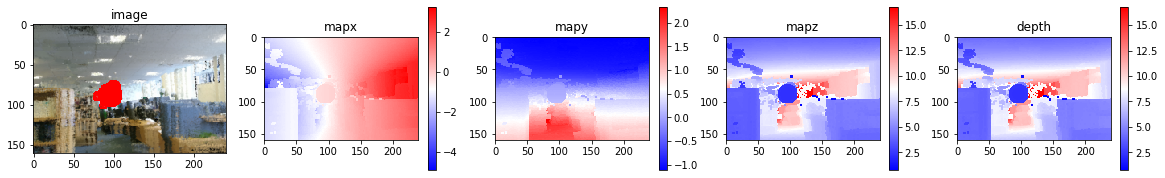


I have rotation  [0, 0, 0]
Prediction percentage: 0.9999996423721313 

Middle pixel Depth: 4.740402659453149
Coordinates of sphere: [-0.3177959377290399, -0.11783769198158409, 4.707076355934187]
Middle 4:
[[4.74040266 4.74040266]
 [4.71896225 4.71896225]]
Middle 8:
[[7.42647242 7.54687066 7.54687066 7.53524155]
 [4.74040266 4.74040266 4.74040266 4.74243136]
 [4.71896225 4.71896225 4.71896225 4.71972228]
 [4.7050069  4.7050069  4.7050069  4.70623389]]


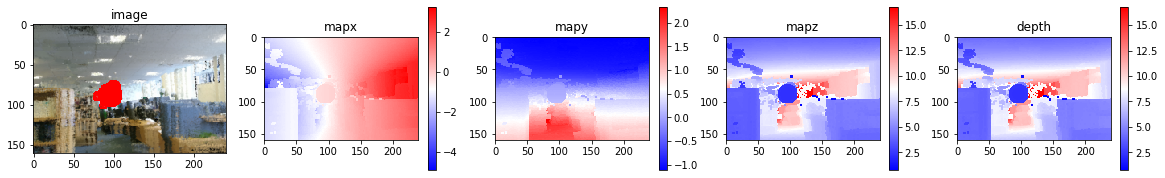


Prediction percentage: 1.0 

Middle pixel Depth: 2.3450562704232105
Coordinates of sphere: [-0.2603576553033593, 0.05510028477643353, 2.3234853872846455]
Middle 4:
[[2.34505627 2.33846136]
 [2.34416108 2.33773005]]
Middle 8:
[[2.3535933  2.34602651 2.34018818 2.33494503]
 [2.35251468 2.34505627 2.33846136 2.33351922]
 [2.351512   2.34416108 2.33773005 2.33282271]
 [2.351512   2.34416108 2.33773005 2.33282271]]


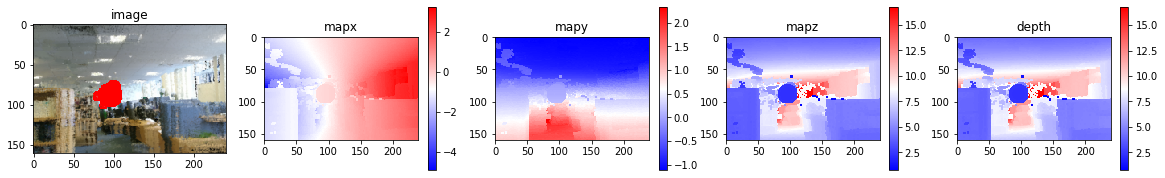


Prediction percentage: 0.9999929666519165 

Middle pixel Depth: 5.163222935319289
Coordinates of sphere: [-0.6111860871315002, 0.6331111325939839, 9.377465033187281]
Middle 4:
[[5.16322294 2.40252887]
 [5.16322294 9.45538913]]
Middle 8:
[[5.16322294 2.40130158 2.38280644 2.37464715]
 [5.16322294 5.16322294 2.40252887 2.38880123]
 [5.16322294 5.16322294 9.45538913 2.41921991]
 [5.36519206 5.36519206 9.45569498 5.28980281]]


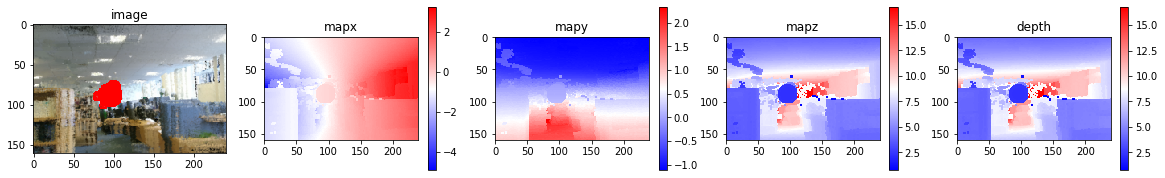


I am at position [0, 0, 0]
I have found 0 out of 11 spheres!

I am now at position [-0.26, 0.05, 2.33]
I have found 1 out of 11 spheres!

Getting maps.... may take a while


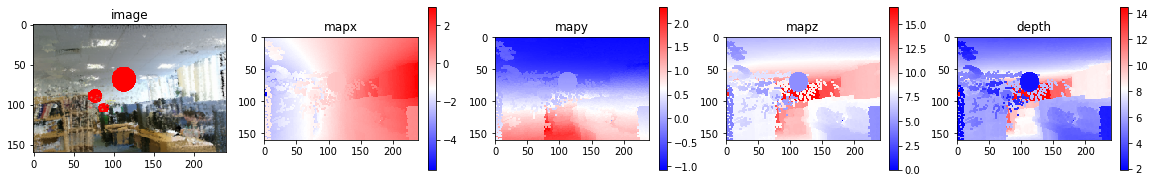


I have rotation  [0, 0, 0]
Prediction percentage: 0.9998801946640015 

Middle pixel Depth: 5.039833863088202
Coordinates of sphere: [-0.6061447858810425, -0.34398049116134644, 7.37600040435791]
Middle 4:
[[5.03983386 5.1228203 ]
 [5.03983386 5.07204009]]
Middle 8:
[[5.01011008 5.03983386 5.1228203  7.74112729]
 [5.01011008 5.03983386 5.1228203  7.89648688]
 [5.01011008 5.03983386 5.07204009 8.02522147]
 [5.05563768 5.05563768 5.05563768 8.14083105]]


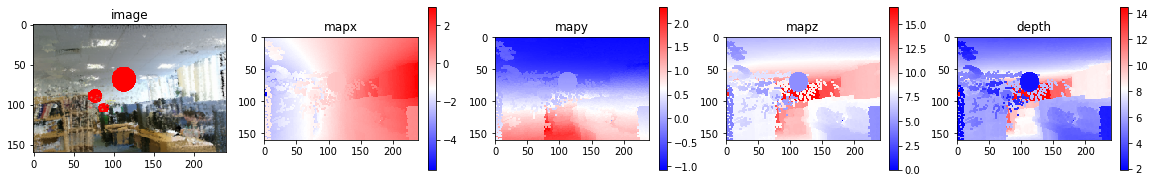


Prediction percentage: 0.9999992847442627 

Middle pixel Depth: 2.416548495953746
Coordinates of sphere: [-0.3081078755842419, -0.12962254612635976, 4.723397464666874]
Middle 4:
[[2.4165485  2.4196489 ]
 [2.39918368 2.40052059]]
Middle 8:
[[7.85089848 7.83205928 7.83205928 7.83205928]
 [2.41509397 2.4165485  2.4196489  2.42444262]
 [2.39918368 2.39918368 2.40052059 2.40484648]
 [2.38643434 2.38751141 2.3887339  2.39271948]]


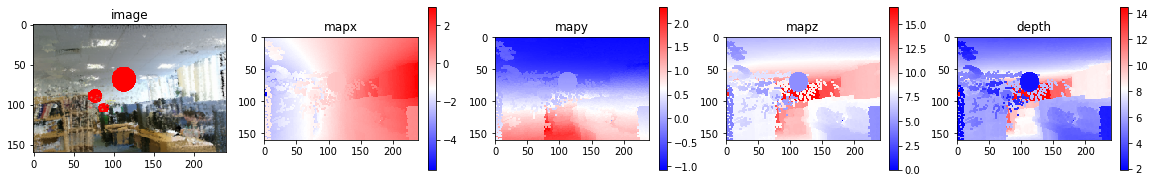


Prediction percentage: 1.0 

Middle pixel Depth: 2.390809465247605
Coordinates of sphere: [-0.4071296477295255, -0.028552891182071424, 4.7058325798681615]
Middle 4:
[[2.39080947 2.3811766 ]
 [2.39080947 2.3811766 ]]
Middle 8:
[[2.40422138 2.39080947 2.3811766  2.37283162]
 [2.40422138 2.39080947 2.3811766  2.37283162]
 [2.40422138 2.39080947 2.3811766  2.37356158]
 [2.40554035 2.39201993 2.3821758  2.37455685]]


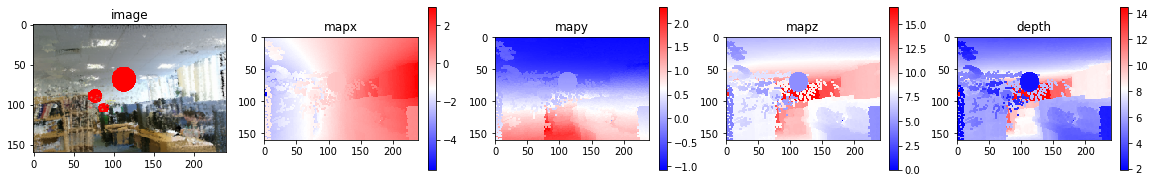


Prediction percentage: 1.0 

Middle pixel Depth: 4.798298038097566
Coordinates of sphere: [-1.0271718884933083, 0.16507207891080794, 7.034510448266663]
Middle 4:
[[4.79829804 4.7740335 ]
 [4.78220032 4.76458902]]
Middle 8:
[[6.4147724  6.40480535 4.79216644 4.77538487]
 [4.94619347 4.79829804 4.7740335  4.76200528]
 [4.81540685 4.78220032 4.76458902 4.75183881]
 [4.80140841 4.77356433 4.75747004 4.74643027]]


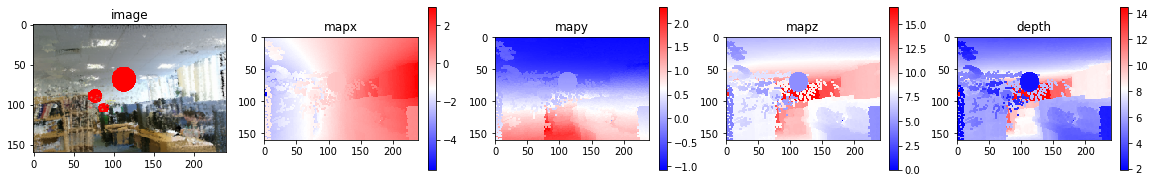


Prediction percentage: 0.4863148331642151 

Middle pixel Depth: 6.350223279692464
Coordinates of sphere: [-0.9871613383293152, 0.57967848787855, 9.394832515403525]
Middle 4:
[[6.35022328 6.35022328]
 [7.12861486 7.12715839]]
Middle 8:
[[6.30582002 6.35022328 6.35022328 7.1776927 ]
 [6.30582002 6.35022328 6.35022328 7.14446484]
 [7.13516746 7.12861486 7.12715839 7.12715839]
 [2.96882736 2.96882736 7.11755763 7.11755763]]


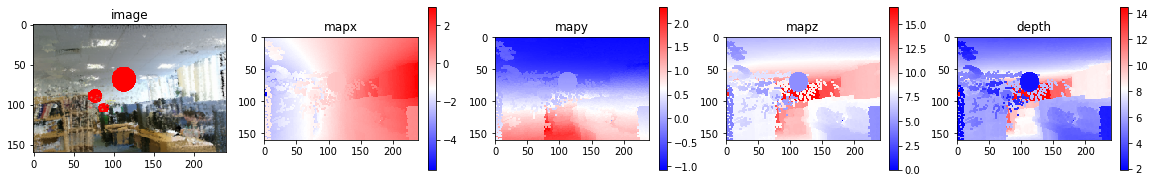


I am at position [-0.26, 0.05, 2.33]
I have found 1 out of 11 spheres!

I am now at position [-0.41, -0.03, 4.71]
I have found 2 out of 11 spheres!

Getting maps.... may take a while


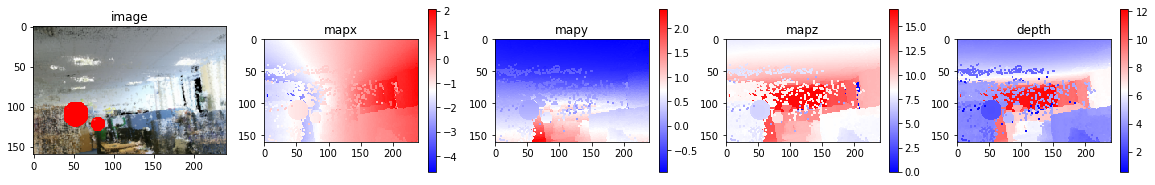


I have rotation  [0, 0, 0]
Prediction percentage: 1.0 

Middle pixel Depth: 3.588320352853976
Coordinates of sphere: [-1.3367855548858643, 0.14444751589920496, 7.06094460392045]
Middle 4:
[[3.58832035 2.45047931]
 [2.44927028 2.43441599]]
Middle 8:
[[3.58832035 3.58832035 3.58832035 2.44430601]
 [3.58832035 3.58832035 2.45047931 2.432387  ]
 [3.6196523  2.44927028 2.43441599 2.42254852]
 [2.46194687 2.43857942 2.42501855 0.77581429]]


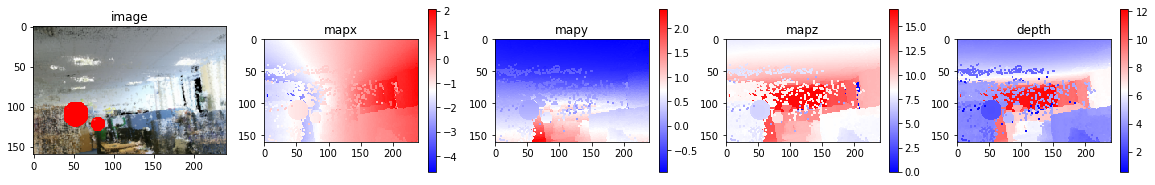


Prediction percentage: 1.0 

Middle pixel Depth: 2.3906705102800543
Coordinates of sphere: [-0.9222075496233595, 0.1438296459414941, 7.0356543255966155]
Middle 4:
[[2.39067051 2.39146057]
 [2.38551737 2.3862002 ]]
Middle 8:
[[2.39682934 2.39695631 2.3978111  2.39924662]
 [2.39046518 2.39067051 2.39146057 2.39277687]
 [2.38495531 2.38551737 2.3862002  2.38736247]
 [2.38060176 2.38071913 2.38161302 2.38314541]]


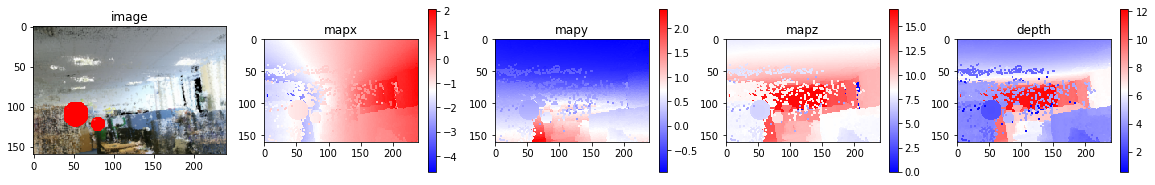


Prediction percentage: 1.0 

Middle pixel Depth: 2.418056701727354
Coordinates of sphere: [-1.0189615120592828, 0.2382959034555112, 7.031204998624923]
Middle 4:
[[2.4180567  2.40824852]
 [2.42419691 2.41246734]]
Middle 8:
[[2.42832763 2.4148601  2.40668919 2.39906004]
 [2.43181865 2.4180567  2.40824852 2.40176076]
 [2.43839439 2.42419691 2.41246734 2.4043034 ]
 [2.44504853 2.42726486 2.41664179 2.4080843 ]]


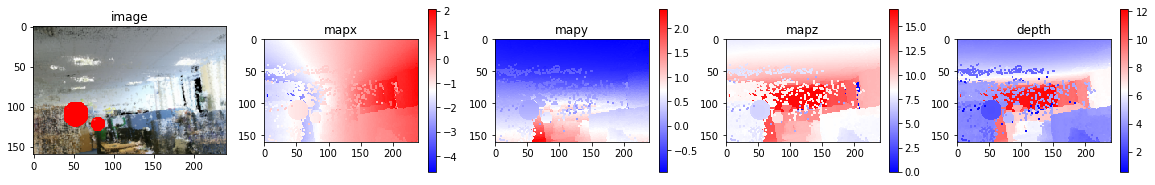


I am at position [-0.41, -0.03, 4.71]
I have found 2 out of 11 spheres!

I am now at position [-0.92, 0.14, 7.04]
I have found 3 out of 11 spheres!

Getting maps.... may take a while


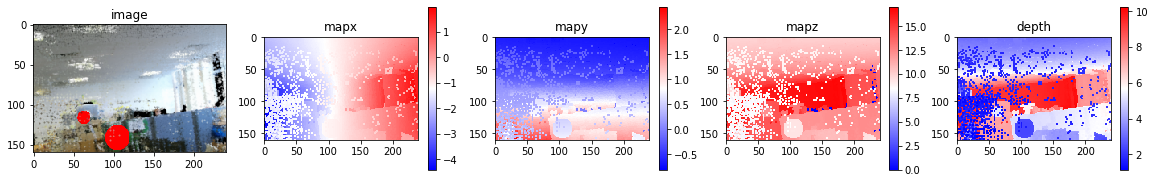


I have rotation  [0, 0, 0]
Prediction percentage: 1.0 

Middle pixel Depth: 1.247285650860065
Coordinates of sphere: [-1.1880379915237427, 0.770790927263093, 12.207876355934188]
Middle 4:
[[1.24728565 5.31714078]
 [1.24728565 5.31640925]]
Middle 8:
[[1.24728565 1.24728565 5.32091658 1.20093444]
 [1.24728565 1.24728565 5.31714078 1.20093444]
 [1.24728565 1.24728565 5.31640925 1.20093444]
 [7.3894072  5.36442802 5.31640925 5.296013  ]]


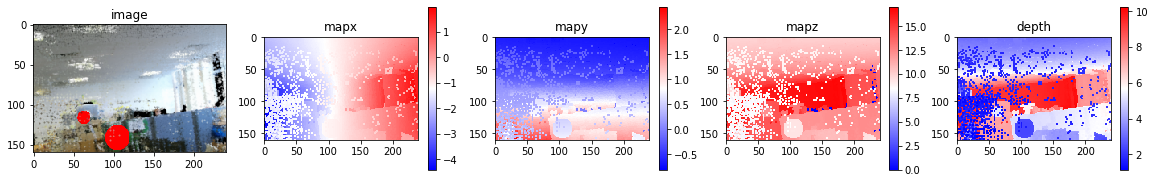


Prediction percentage: 1.0 

Middle pixel Depth: 5.319704409634685
Coordinates of sphere: [-1.8135668726981236, 1.0198829174041748, 14.099081993103027]
Middle 4:
[[5.31970441 7.24860619]
 [5.31970441 7.20593261]]
Middle 8:
[[1.35147156 1.35147156 1.35147156 7.27650491]
 [5.29829627 5.31970441 7.24860619 7.25691883]
 [5.29792672 5.31970441 7.20593261 7.20593261]
 [5.29792672 1.4334027  1.4334027  1.4334027 ]]


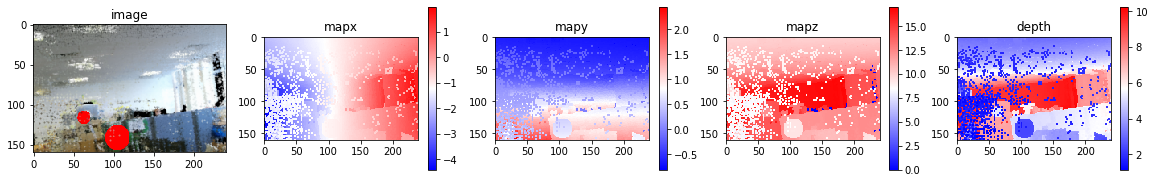


Prediction percentage: 1.0 

Middle pixel Depth: 2.427513565151222
Coordinates of sphere: [-1.068130646280359, 0.5550214623100624, 9.418228593740478]
Middle 4:
[[2.42751357 2.42412988]
 [2.42027818 2.41828633]]
Middle 8:
[[2.4421668  2.43712278 2.43344233 2.43296948]
 [2.43115972 2.42751357 2.42412988 2.42368566]
 [2.42211595 2.42027818 2.41828633 2.41648177]
 [1.52550909 1.52550909 1.52550909 2.41004825]]


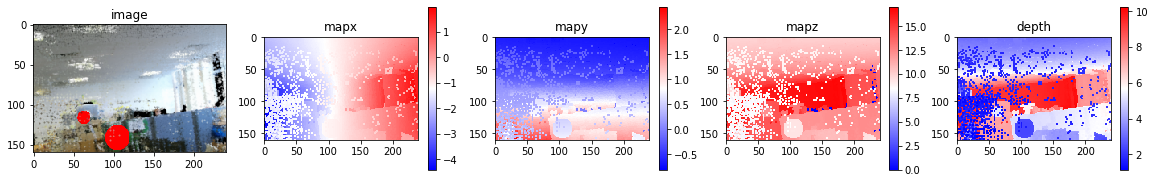


Prediction percentage: 0.9999655485153198 

Middle pixel Depth: 2.469871619789795
Coordinates of sphere: [-0.9719003084731894, 0.5647389724962076, 9.473774085159523]
Middle 4:
[[2.46987162 5.03280577]
 [2.45388691 2.47095823]]
Middle 8:
[[2.47571885 5.02405117 5.03280577 5.07733458]
 [2.45612512 2.46987162 5.03280577 5.05513381]
 [2.4439828  2.45388691 2.47095823 5.05513381]
 [2.43411941 2.44495566 2.45819786 2.47943604]]


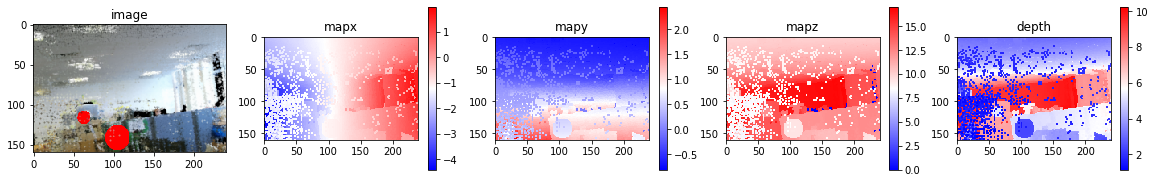


I am at position [-0.92, 0.14, 7.04]
I have found 3 out of 11 spheres!

I am now at position [-1.19, 0.28, 8.25]
PACMANFUNCTIONALITY - NO SPHERES AT LOCATION
I have found 3 out of 11 spheres!

Getting maps.... may take a while


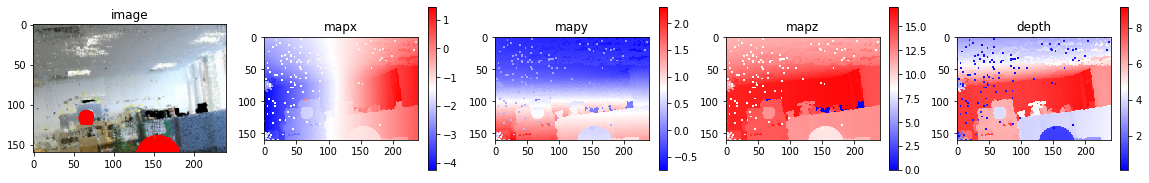


I have rotation  [0, 0, 0]
Prediction percentage: 1.0 

Middle pixel Depth: 6.0605595306353175
Coordinates of sphere: [-2.4381988048553467, 0.7783, 12.257567790315015]
Middle 4:
[[6.06055953 6.05929753]
 [6.14178765 4.1238325 ]]
Middle 8:
[[6.13585043 6.05245209 6.05245209 4.08255522]
 [6.13585043 6.06055953 6.05929753 4.07822286]
 [6.13585043 6.14178765 4.1238325  4.07673848]
 [6.14178765 6.14178765 4.1238325  4.07673848]]


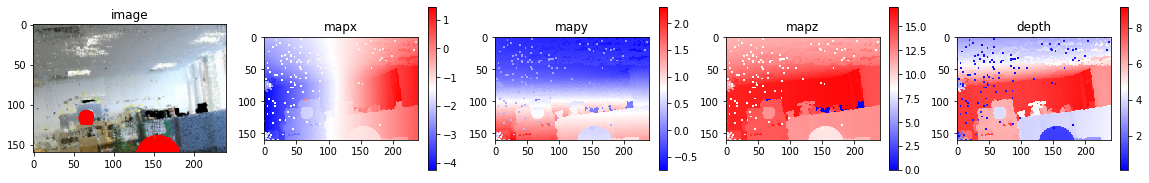


Prediction percentage: 1.0 

Middle pixel Depth: 4.024784569013955
Coordinates of sphere: [-1.866114908929116, 0.7702925258272175, 12.194294475841664]
Middle 4:
[[4.02478457 4.03020218]
 [4.02455033 4.02971809]]
Middle 8:
[[4.02351461 4.02684475 4.03208227 4.03960717]
 [4.02148417 4.02478457 4.03020218 4.03737482]
 [4.02121929 4.02455033 4.02971809 4.03703414]
 [4.02121929 4.02455033 4.02971809 4.03703414]]


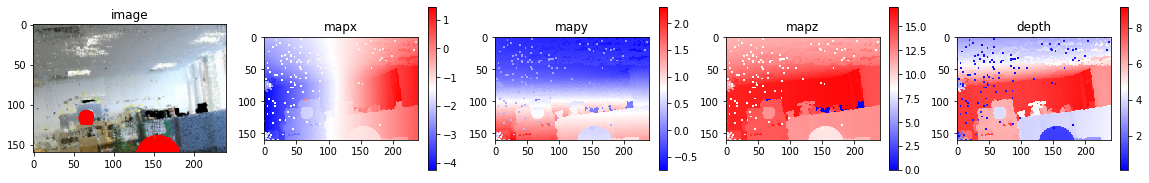


I am at position [-1.19, 0.28, 8.25]
I have found 3 out of 11 spheres!

I am now at position [-1.87, 0.76, 12.19]
I have found 4 out of 11 spheres!

Getting maps.... may take a while


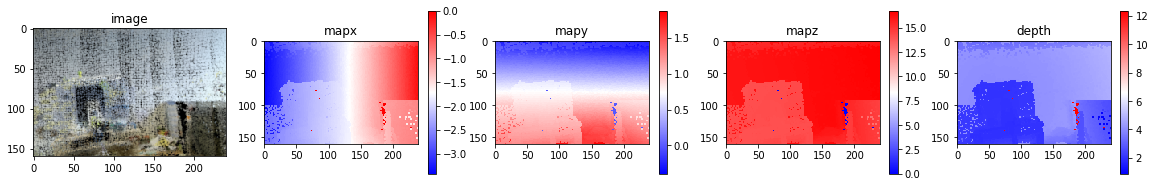


I have rotation  [0, 0, 0]
### No spheres found, rotating
Getting maps.... may take a while


KeyboardInterrupt: 

In [42]:
################ TEST ##################

# Initilise game
from datetime import datetime
print('Start time:')
print(datetime.now().strftime('%H:%M:%S') )

import PacMan_functionality as PacMan
global_cloud, spheres_collected = PacMan.startup_scene()    # Have to use subsample, it effects acuracy but its way too slow otherwise
position = np.asarray([0, 0, 0])
angle = np.asarray([0, 0, 0])

while not np.all(spheres_collected): # While there are spheres to find
    # Get current image from viewpoint
    print('Getting maps.... may take a while')
    image, mapx, mapy, mapz, depth = PacMan.project_pointcloud_image(global_cloud, angle, position)
    visualise_maps(image, mapx, mapy, mapz, depth)

    print('I have rotation  [{0}, {1}, {2}]'.format(*angle))

    # Extract patches from the scene    
    # Extract features from the patches

    #res = sliding_window_classifier(20, image)  # Return list of x,y,predict,depth
    res = sliding_window_classifier(15, image, mapx, mapy, mapz, depth)

    # Predict the probability of a pixel being a sphere, based on the patch    
    # Use probabilities to find sphere coordinates in 3D

    if (len(res) > 0 ): # If spheres were found
        min_index = np.argmin(res[:,3])
        x = int(res[min_index, 0])    # From float to int
        y = int(res[min_index, 1])    

        # Get spacial coordinates of new sphere
        # and move there apparantly
        global_cloud, spheres_collected, position = sphere_position(x, y, position, spheres_collected)  

    else:   # No spheres found
        print('### No spheres found, rotating')
        #add pi/3 to roatation
        # Maybe reshow views?
        angle = angle - np.asarray([0, np.pi*1/3, 0])   # numpy + is an elementwise operation 
        #image, mapx, mapy, mapz, depth = PacMan.project_pointcloud_image(global_cloud, new_angle, position)
        #visualise_maps(image, mapx, mapy, mapz, depth) # Visualise after rotation

        continue


    # Update camera appropriately
    
    # Update scene if needed

In [6]:
# Problem at position [-1.9, 0.77, 12.18]
# Sphere 4 or5is skipped 
# Look at pointcloud

In [0]:
pptk.viewer(global_cloud['Positions'], global_cloud['Colors']/255.0)

Start time:
13:08:29
I have found 0 out of 11 spheres!

I have found 5 out of 11 spheres!



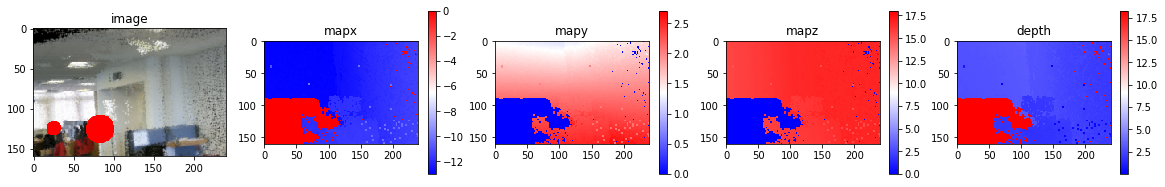


Prediction percentage: 1.0 

Middle pixel Depth: 18.26960590707966
Coordinates of sphere: [0.0, 0.0, 0.0]
Middle 4:
[[18.26960591 18.26960591]
 [18.26960591 18.26960591]]
Middle 8:
[[18.26960591 18.26960591 18.26960591 18.26960591]
 [18.26960591 18.26960591 18.26960591 18.26960591]
 [18.26960591 18.26960591 18.26960591 18.26960591]
 [18.26960591 18.26960591 18.26960591 18.26960591]]


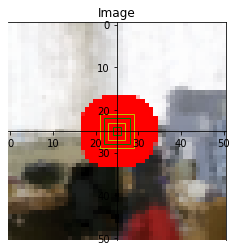

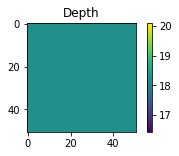

########################################

Prediction percentage: 0.999833345413208 

Middle pixel Depth: 1.8936798287478573
Coordinates of sphere: [-11.81556224822998, 2.3431053161621094, 15.81285285949707]
Middle 4:
[[1.89367983 1.9059075 ]
 [1.89367983 2.04304305]]
Middle 8:
[[1.90737569 1.97625182 1.9059075  1.9059075 ]
 [1.89367983 1.89367983 1.9059075  1.9059075 ]
 [1.89367983 1.89367983 2.04304305 2.04304305]
 [1.89367983 1.89367983 2.04304305 2.04304305]]


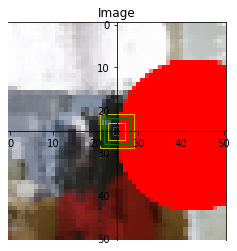

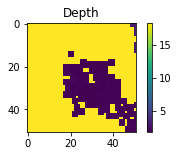

########################################



In [38]:
#
print('Start time:')
print(datetime.now().strftime('%H:%M:%S') )

import PacMan_functionality as PacMan
global_cloud, spheres_collected = PacMan.startup_scene()    # Have to use subsample, it effects acuracy but its way too slow otherwise

print('I have found {0} out of {1} spheres!\n'.format(np.sum(spheres_collected), len(spheres_collected)));

# Change so first 5 spheres are collected and go away
spheres_collected = [True, True, True, True, True, False, False, False, False, False, False]
print('I have found {0} out of {1} spheres!\n'.format(np.sum(spheres_collected), len(spheres_collected)));

position = np.asarray([-1.9, 0.77, 12.18])
angle = np.asarray([0, np.pi/-3, 0])
global_cloud, spheres_collected = PacMan.update_scene(position, spheres_collected);

# Obtain image and associated maps
image, map1, map2, map3, map4 = PacMan.project_pointcloud_image(global_cloud, angle, position)
visualise_maps(image, mapx, mapy, mapz, depth)
res = sliding_window_classifier(20, image, mapx, mapy, mapz, depth)

In [0]:
#[-11.947921752929688, 2.3431053161621094, 15.81285285949707]

In [0]:
%%time  #Wall time: 5.65 s
# Visualise world before we move
visualise_maps(image, mapx, mapy, mapz, depth)

# Attemp to find spheres
res = sliding_window_classifier(20, image)  # Return list of x,y,predict,depth
print(res)

# Get x,y of sphere with minimum depth aka closest sphere
min_index = np.argmin(res[:,3]) #npres [:,3] is list of depths. argmin is index of min depth
x = int(res[min_index, 0])    # From float to int
y = int(res[min_index, 1])    

global_cloud, spheres_collected, position = sphere_position(x, y, position, spheres_collected)    # Get spacial coordinates of new sphere
# and move there apparantly

In [0]:
%%time  #Wall time: 1min 11s
# Get new images
image, mapx, mapy, mapz, depth = PacMan.project_pointcloud_image(global_cloud, angle, position)

In [0]:
%%time  #Wall time: 7.28 s
# Visualise world before we move
visualise_maps(image, mapx, mapy, mapz, depth)

# Attemp to find spheres
res = sliding_window_classifier(20, image)  # Return list of x,y,predict,depth
print(res)

# Get x,y of sphere with minimum depth aka closest sphere
min_index = np.argmin(res[:,3]) #npres [:,3] is list of depths. argmin is index of min depth
print('Minimum depth: {}'.format( np.min(res[:,3]) ))
x = int(res[min_index, 0])    # From float to int
y = int(res[min_index, 1])    

global_cloud, spheres_collected, position = sphere_position(x, y, position, spheres_collected)    # Get spacial coordinates of new sphere
# and move there apparantly

In [0]:
%%time  #Wall time: 25.1 s
# Get new images
image, mapx, mapy, mapz, depth = PacMan.project_pointcloud_image(global_cloud, angle, position)

In [0]:
#################### BEFORE ABOVE CRASHED BUT WITH CHANGES TO CODE IT SHOULD JUST MOVE TO THE POSITION NOW

In [0]:
%%time  #Wall time: 11.1 s
# Visualise world before we move
visualise_maps(image, mapx, mapy, mapz, depth)

# Attemp to find spheres
res = sliding_window_classifier(20, image)  # Return list of x,y,predict,depth
print(res)

# Get x,y of sphere with minimum depth aka closest sphere
min_index = np.argmin(res[:,3]) #npres [:,3] is list of depths. argmin is index of min depth
print('Minimum depth: {}'.format( np.min(res[:,3]) ))
x = int(res[min_index, 0])    # From float to int
y = int(res[min_index, 1])    
print('X: {}, Y: {}'.format( x, y) )

global_cloud, spheres_collected, position = sphere_position(x, y, position, spheres_collected)    # Get spacial coordinates of new sphere
# and move there apparantly

In [0]:
%%time  #Wall time: 22.9 s
# Get new images
image, mapx, mapy, mapz, depth = PacMan.project_pointcloud_image(global_cloud, angle, position)

In [0]:
#%%time
# Visualise world before we move
visualise_maps(image, mapx, mapy, mapz, depth)

# Attemp to find spheres
res = sliding_window_classifier(20, image)  # Return list of x,y,predict,depth
print(res)

# Get x,y of sphere with minimum depth aka closest sphere
min_index = np.argmin(res[:,3]) #npres [:,3] is list of depths. argmin is index of min depth
print('Minimum depth: {}'.format( np.min(res[:,3]) ))
x = int(res[min_index, 0])    # From float to int
y = int(res[min_index, 1])    
print('X: {}, Y: {}'.format( x, y) )

global_cloud, spheres_collected, position = sphere_position(x, y, position, spheres_collected)    # Get spacial coordinates of new sphere
# and move there apparantly

In [0]:
%%time
# Get new images
image, mapx, mapy, mapz, depth = PacMan.project_pointcloud_image(global_cloud, angle, position)

In [0]:
#%%time
# Visualise world before we move
visualise_maps(image, mapx, mapy, mapz, depth)

# Attemp to find spheres
res = sliding_window_classifier(20, image)  # Return list of x,y,predict,depth
print(res)

# Get x,y of sphere with minimum depth aka closest sphere
min_index = np.argmin(res[:,3]) #npres [:,3] is list of depths. argmin is index of min depth
print('Minimum depth: {}'.format( np.min(res[:,3]) ))
x = int(res[min_index, 0])    # From float to int
y = int(res[min_index, 1])    
print('X: {}, Y: {}'.format( x, y) )

global_cloud, spheres_collected, position = sphere_position(x, y, position, spheres_collected)    # Get spacial coordinates of new sphere
# and move there apparantly

In [0]:
# Ignore error thats just error when no sphere is called.
# Now we can detect the first row of spheres
# Now look at the pointcloud to assess the situation.

In [0]:
%%time
# matplotlib functionality wrapped by PacMan_functionality
PacMan.show_point_cloud(global_cloud, subsample=50)

# pptk pointcloud viewer
import pptk
pptk.viewer(global_cloud['Positions'], global_cloud['Colors']/255.0)

In [0]:
%%time
# At this point I want to look to my left -60 degres ish
# π/3 = −60°
new_angle = np.asarray([0, -np.pi/3, 0]) # Rotate to left slightly?
image, mapx, mapy, mapz, depth = PacMan.project_pointcloud_image(global_cloud, new_angle, position)
visualise_maps(image, mapx, mapy, mapz, depth)

In [0]:
%%time
# Get new images #### New angle
image, mapx, mapy, mapz, depth = PacMan.project_pointcloud_image(global_cloud, new_angle, position)

In [0]:
%%time
# Visualise world before we move
visualise_maps(image, mapx, mapy, mapz, depth)

# Attemp to find spheres
res = sliding_window_classifier(20, image)  # Return list of x,y,predict,depth
print(res)

# Get x,y of sphere with minimum depth aka closest sphere
min_index = np.argmin(res[:,3]) #npres [:,3] is list of depths. argmin is index of min depth
print('Minimum depth: {}'.format( np.min(res[:,3]) ))
x = int(res[min_index, 0])    # From float to int
y = int(res[min_index, 1])    
print('X: {}, Y: {}'.format( x, y) )

global_cloud, spheres_collected, position = sphere_position(x, y, position, spheres_collected)    # Get spacial coordinates of new sphere
# and move there apparantly

In [0]:
#